#### OBJETIVO: Regresiones lineales a partir de los mapas diarios predichos con /sin AOD vs las mediciones en cada centro urbano

In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr


In [21]:
#Lo hacemos asi porque todos son distintos entonces lo ponemos una vez y ya esta
STATIONS = {
    "SP": {
            "colors": {
            "AOD": "#a1d99b",
            "sAOD": "#41ab5d",
        }
    },
    "CH": {
        
        "colors": {
            
            "AOD": "#feb24c",
            "sAOD": "#fc4e2a",
        }
    },
    "BA": {
        
        "colors": {
            
            "AOD": "#fb6a4a",
            "sAOD": "#99000d",
        }
    },
    "MD": {
        
        "colors": {
            
            "AOD": "#9ecae1",
            "sAOD": "#2171b5",
        }
    },
    "MX": {
        
        "colors": {
           
            "AOD": "#807dba",
            "sAOD": "#810f7c",
        }
    },
}



In [48]:
BASE_PATH = "D:/Josefina/Proyectos/Tesis"

def load_station(est, file_AOD, file_sAOD):
    path_AOD = f"{BASE_PATH}/{est}/resultados/merge_Prediccion_Real/{file_AOD}"
    path_sAOD = f"{BASE_PATH}/{est}/resultados/merge_Prediccion_Real/{file_sAOD}"

    AOD = pd.read_csv(path_AOD,  encoding="latin1")
    sAOD = pd.read_csv(path_sAOD, encoding="latin1")

    for df in [AOD, sAOD]:
        df["date"] = pd.to_datetime(df["date"])
        df = df[df["date"].dt.year == 2024]

    merged = AOD.merge(
        sAOD,
        on=["date"],#, "estacion"],
        suffixes=("_AOD", "_sAOD")
    )
    # print(merged.columns)
    merged["pm25_pred_AOD"] = merged["valor_raster_AOD"]
    # merged["pm25_obs_AOD"] = merged["mean_AOD"]
    merged["pm25_obs_AOD"] = merged["Registros.completos_AOD"]#En CH usamos esto

    merged["pm25_pred_sAOD"] = merged["valor_raster_sAOD"]
    # merged["pm25_obs_sAOD"] = merged["mean_sAOD"]
    merged["pm25_obs_sAOD"] = merged["Registros.completos_sAOD"]#En CH usamos esto

    return merged

In [11]:

def metrics(y_true, y_pred):
    r = pearsonr(y_true, y_pred)[0]
    r2 = r**2
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    bias = np.mean(y_pred - y_true)
    return r2, rmse, bias



In [31]:

def plot_regression(df, colors, title=""):

    r2_s, rmse_s, bias_s = metrics(df["pm25_obs_sAOD"], df["pm25_pred_sAOD"])
    r2_a, rmse_a, bias_a = metrics(df["pm25_obs_AOD"], df["pm25_pred_AOD"])

    plt.figure(figsize=(5,5))

    # puntos
    plt.scatter(df["pm25_obs_sAOD"], df["pm25_pred_sAOD"],
                color=colors[0], s=15, alpha=0.9)

    plt.scatter(df["pm25_obs_AOD"], df["pm25_pred_AOD"],
                color=colors[1], s=15, alpha=0.6)

    # regresiones
    for x, y, c in [
        (df["pm25_obs_sAOD"], df["pm25_pred_sAOD"], colors[0]),
        (df["pm25_obs_AOD"], df["pm25_pred_AOD"], colors[1])
    ]:
        m, b = np.polyfit(x, y, 1)
        xs = np.linspace(0, 160, 100)
        plt.plot(xs, m*xs + b, color=c)

    # línea ideal
    plt.plot([0,160],[0,160], color="black")

    plt.xlim(0,160)
    plt.ylim(0,160)
    plt.xticks(np.arange(0,161,40))
    plt.yticks(np.arange(0,161,40))

    plt.xlabel("Observado")
    plt.ylabel("Predicción")
    plt.title(title)
    plt.legend
    # anotacione
    plt.text(5,150,"sAOD", fontsize=9)
    plt.text(5,145,f"R² = {r2_s:.2f}")
    plt.text(5,140,f"RMSE = {rmse_s:.2f}")
    plt.text(5,135,f"Bias = {bias_s:.2f}")

    plt.text(45,150,"AOD", fontsize=9)
    plt.text(45,145,f"R² = {r2_a:.2f}")
    plt.text(45,140,f"RMSE = {rmse_a:.2f}")
    plt.text(45,135,f"Bias = {bias_a:.2f}")

    plt.tight_layout()
    plt.show()

C:\Users\Josefina Urquiza\AppData\Local\Temp\ipykernel_8828\657952330.py:8: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  sAOD = pd.read_csv(path_sAOD, encoding="latin1")


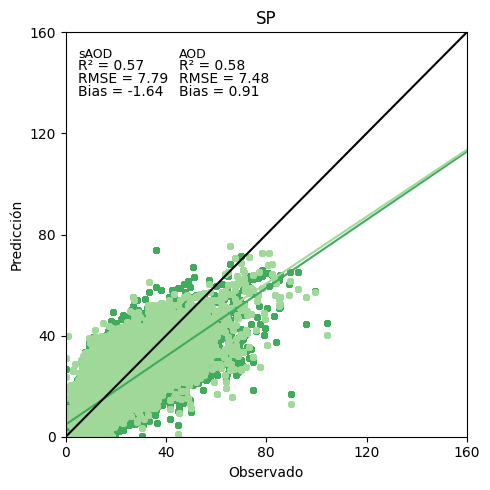

In [ ]:
estacion = "SP"
df_SP = load_station(
    "SP",
    "SP_merge_01-XGB-CV-M1-200525-SP.csv",
    "SP_merge_02-XGB-CV-1-210525-sAOD-SP.csv"
)

plot_regression(
    df_SP,
    colors=[STATIONS[estacion]['colors']['sAOD'],STATIONS[estacion]['colors']['AOD']],
    title=estacion
)


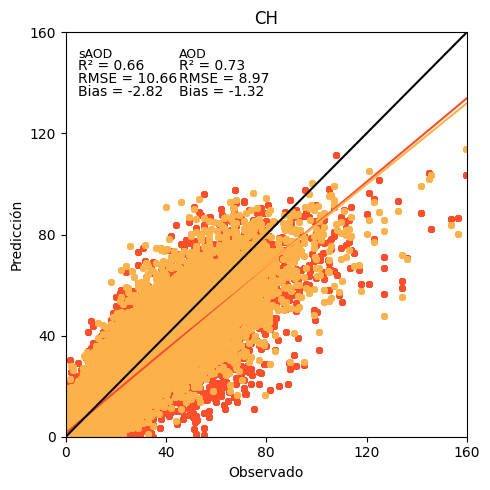

In [49]:
estacion = "CH"
df = load_station(
    estacion,
    "CH_merge_01-XGB-CV-M1-190625-CH.csv",
    "CH_merge_02-XGB-CV-M1-230625-sAOD-CH.csv"
)

plot_regression(
    df,
    colors=[STATIONS[estacion]['colors']['sAOD'],STATIONS[estacion]['colors']['AOD']],
    title=estacion
)


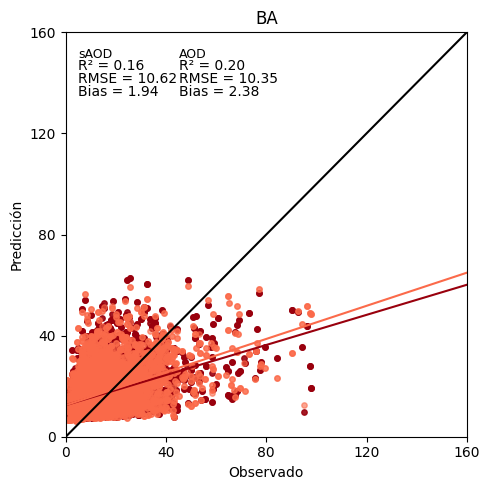

In [45]:
estacion = "BA"
df = load_station(
    "BA",
    "BA_merge_01-ET-CV-M1-170625-BA.csv",
    "BA_merge_02-ET-CV-M1-230625-sAOD-BA.csv"
)

plot_regression(
    df,
    colors=[STATIONS[estacion]['colors']['sAOD'],STATIONS[estacion]['colors']['AOD']],
    title=estacion
)

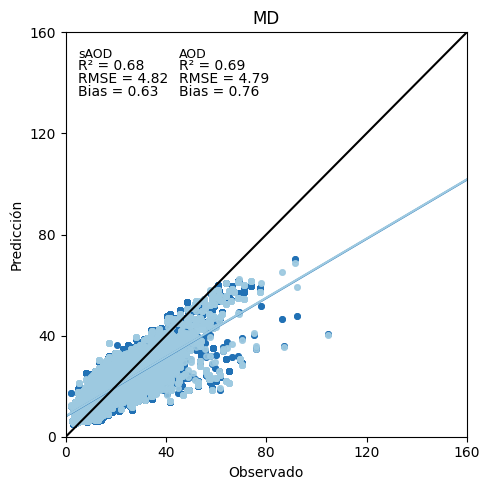

In [46]:
estacion = "MD"
df = load_station(
    estacion,
    "MD_merge_01-ET-CV-M1-260525-MD.csv",
    "MD_merge_01-ET-CV-M1-270525-sAOD-MD.csv"
)

plot_regression(
    df,
    colors=[STATIONS[estacion]['colors']['sAOD'],STATIONS[estacion]['colors']['AOD']],
    title=estacion
)

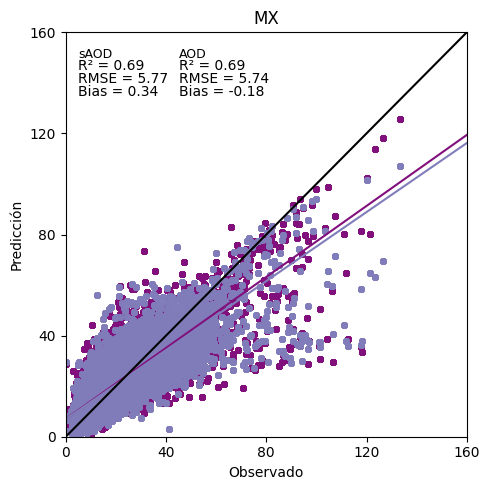

In [47]:
estacion = "MX"
df = load_station(
    estacion,
    "MX_merge_01-XGB-CV-M1-290525-MX.csv",
    "MX_merge_02-XGB-CV-M1-230625-sAOD-MX.csv"
)

plot_regression(
    df,
    colors=[STATIONS[estacion]['colors']['sAOD'],STATIONS[estacion]['colors']['AOD']],
    title=estacion
)